# Real Estate Price Prediction

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df=pd.read_csv("Real_Estate.csv")
df.head(5)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
df.columns.values

array(['Transaction date', 'House age',
       'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'], dtype=object)

In [35]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [36]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

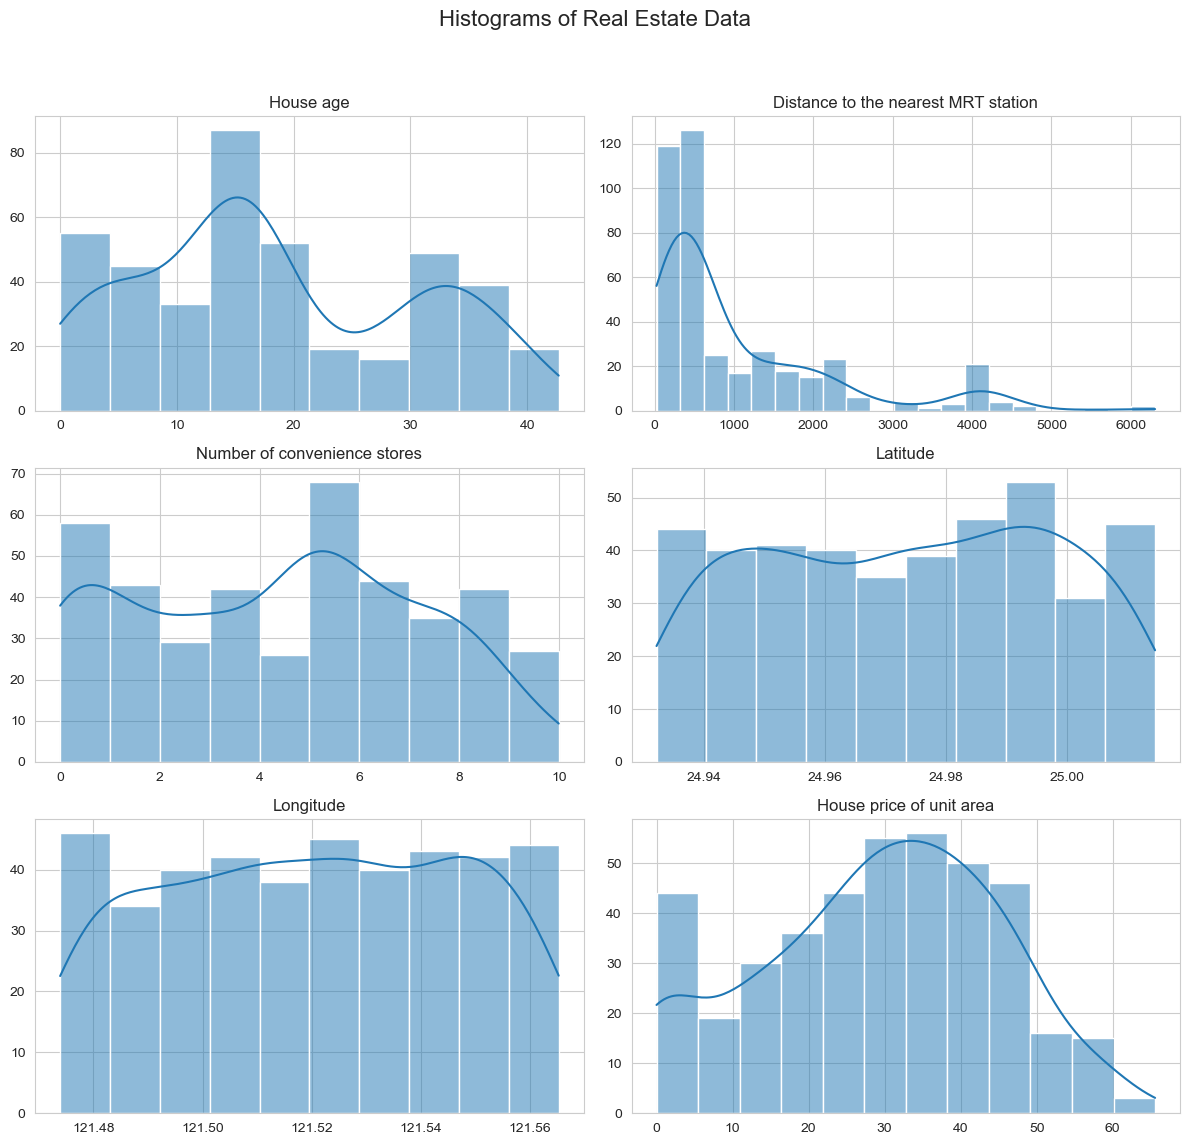

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

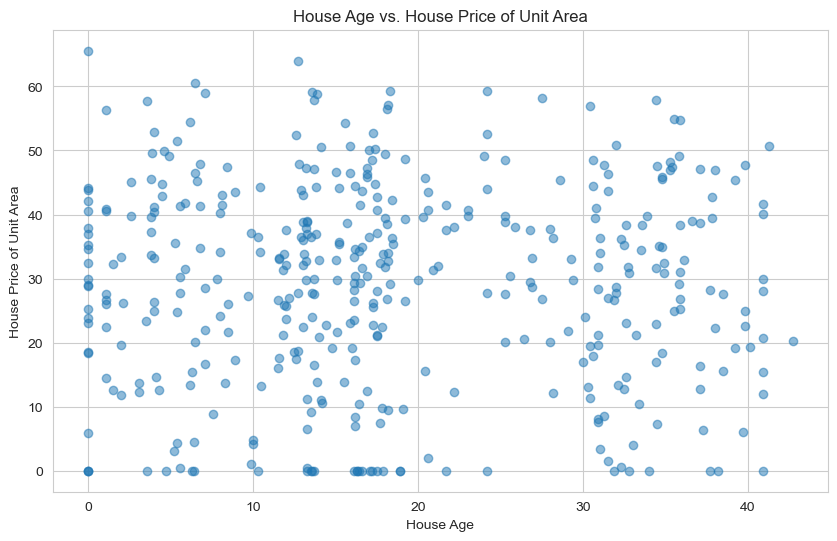

In [39]:
import matplotlib.pyplot as plt
house_age = df['House age']
house_price = df['House price of unit area']
plt.figure(figsize=(10, 6))
plt.scatter(house_age, house_price, alpha=0.5)
plt.title('House Age vs. House Price of Unit Area')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.grid(True)
plt.show()


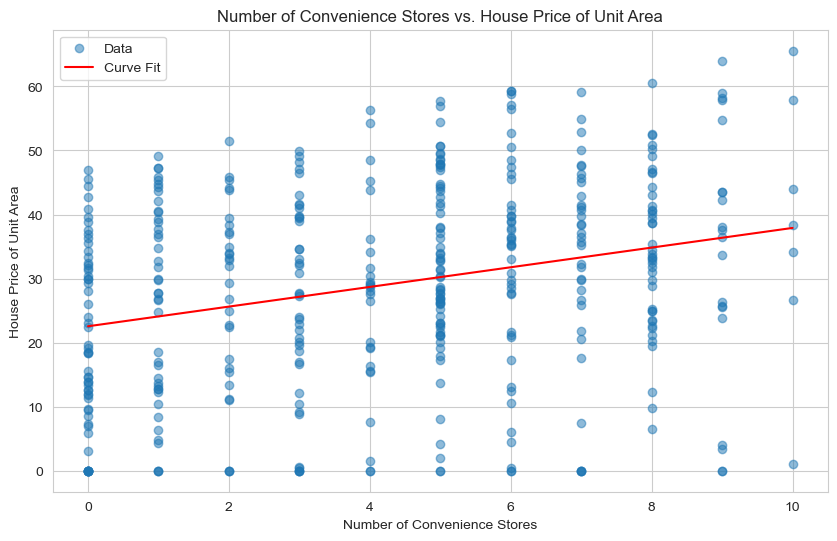

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
convenience_stores = df['Number of convenience stores']
house_price = df['House price of unit area'] 
def func(x, a, b):
    return a * x + b
params, covariance = curve_fit(func, convenience_stores, house_price)
x_curve = np.linspace(min(convenience_stores), max(convenience_stores), 100)
y_curve = func(x_curve, *params)

plt.figure(figsize=(10, 6))
plt.scatter(convenience_stores, house_price, label='Data', alpha=0.5)
plt.plot(x_curve, y_curve, color='red', label='Curve Fit')
plt.title('Number of Convenience Stores vs. House Price of Unit Area')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.legend()
plt.grid(True)
plt.show()


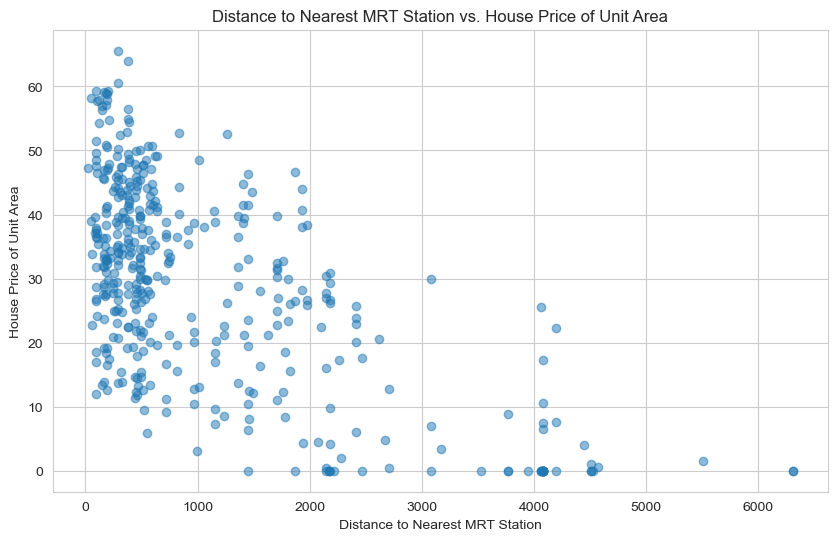

In [41]:
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# If not, replace 'df' with your actual DataFrame name

# Extracting relevant columns
distance_to_mrt = df['Distance to the nearest MRT station']
house_price = df['House price of unit area']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(distance_to_mrt, house_price, alpha=0.5)
plt.title('Distance to Nearest MRT Station vs. House Price of Unit Area')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.grid(True)
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

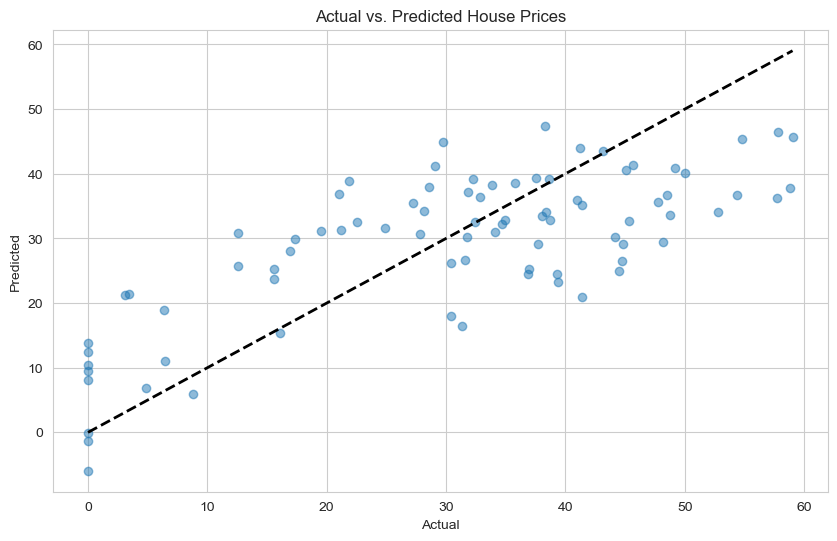

In [43]:
y_pred_lr = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()